In [58]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df = pd.read_csv('train.csv', usecols=['Age','Fare','Survived'])

In [60]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [61]:
df.isna().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [62]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [64]:
X_train.head()

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458


In [65]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [66]:
X_train.tail()

,Age,Fare,Age_imputed
534,30.0,8.6625,30.0
584,NaN,8.7125,NaN
493,71.0,49.5042,71.0
527,NaN,221.7792,NaN
168,NaN,25.9250,NaN


In [67]:
X_train['Age_imputed'][X_train['Age_imputed'].isna()] = X_train['Age'].dropna().sample(X_train['Age'].isna().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isna()] = X_train['Age'].dropna().sample(X_test['Age'].isna().sum()).values

D:\Temp\ipykernel_1180\2669190377.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['Age_imputed'][X_train['Age_imputed'].isna()] = X_train['Age'].dropna().sample(X_train['Age'].isna().sum()).values
D:\Temp\ipykernel_1180\266919037

In [91]:
X_train['Age'].dropna().sample(X_train['Age'].isna().sum()).values

array([27.  , 29.  , 31.  , 54.  , 25.  , 19.  ,  8.  , 18.  , 36.  ,
       39.  , 19.  , 27.  , 36.  , 34.  , 19.  , 27.  , 35.  , 35.  ,
       29.  , 33.  , 24.  ,  4.  , 47.  , 42.  , 32.  , 58.  , 16.  ,
       20.  , 18.  , 36.  , 52.  , 40.  , 24.  , 38.  , 30.  , 32.  ,
       48.  , 32.  ,  9.  , 25.  , 38.  , 42.  , 18.  , 22.  , 17.  ,
        8.  , 30.5 , 61.  , 42.  , 24.  ,  0.75,  4.  , 63.  , 16.  ,
       29.  , 21.  , 31.  , 28.  , 14.  , 38.  , 39.  , 35.  , 42.  ,
       34.  , 42.  , 22.  , 64.  , 16.  , 21.  , 29.  , 19.  ,  9.  ,
       18.  , 30.  , 45.  , 30.  ,  6.  , 36.  , 38.  ,  1.  , 41.  ,
       27.  , 21.  , 36.  , 27.  , 58.  , 50.  , 18.  , 47.  , 42.  ,
       28.  , 51.  , 27.  , 26.  , 38.  , 35.  , 19.  , 30.  , 47.  ,
       24.  , 62.  , 14.  , 28.  , 32.  , 33.  , 35.  ,  9.  ,  2.  ,
       56.  , 24.  , 25.  , 24.  , 24.  , 24.  ,  0.67, 33.  , 18.  ,
        4.  , 54.  , 14.  , 33.  , 20.  , 35.  , 36.  , 29.  ,  2.  ,
       45.  , 18.  ,

In [93]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,34.0
493,71.0,49.5042,71.0
527,NaN,221.7792,30.0


D:\Temp\ipykernel_1180\742474952.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],label='Original',hist=False)
D:\Temp\ipykernel_1180\742474952.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age_imputed'],label='imputed',hist=False)


<Axes: xlabel='Age_imputed', ylabel='Density'>

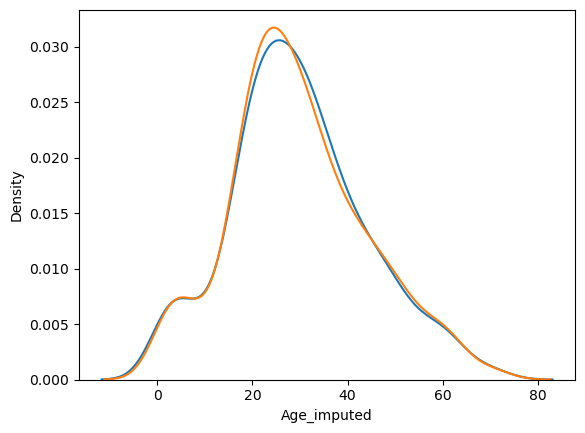

In [97]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label='imputed',hist=False)

In [99]:
print('Original variable variance',X_train['Age'].var())
print('Imputed variable variance',X_train['Age_imputed'].var())

Original variable variance 204.3495133904614
Imputed variable variance 205.39343649690255


In [105]:
X_train[['Fare','Age','Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,60.327575
Age,71.512440,204.349513,204.349513
Age_imputed,60.327575,204.349513,205.393436


<Axes: >

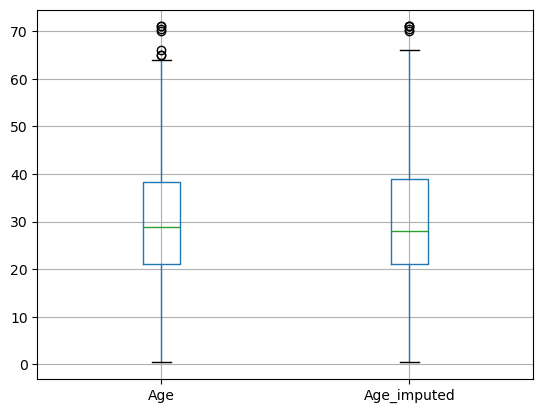

In [107]:
X_train[['Age','Age_imputed']].boxplot()

# categorical

In [112]:
#  sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))

In [118]:
data = pd.read_csv('house-train.csv', usecols=['GarageQual','FireplaceQu','SalePrice'])

In [120]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [122]:
data.isna().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [124]:
x = data
y = data['SalePrice']

In [126]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [128]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed']= X_test['FireplaceQu']

In [130]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
73,NaN,TA,144900,TA,NaN
972,TA,TA,99500,TA,TA
928,TA,TA,236500,TA,TA
657,Gd,TA,149000,TA,Gd
186,NaN,TA,173000,TA,NaN


In [132]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isna()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isna().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isna()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isna().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isna()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isna().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isna()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isna().sum()).values

D:\Temp\ipykernel_1180\983467183.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isna()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isna().sum()).values
D:\Te

In [138]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
156,NaN,TA,109500,TA,Gd
791,TA,TA,146800,TA,TA
800,NaN,TA,200000,TA,Gd
860,Gd,TA,189950,TA,Gd
521,Gd,TA,150000,TA,Gd


In [162]:
temp = pd.concat(
    [
        X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
        X_train['GarageQual_imputed'].value_counts() / len(X_train)
    ],
axis=1)

temp.columns = ['Original','imputed']

In [164]:
temp

,Original,imputed
TA,0.951043,0.951199
Fa,0.037171,0.036815
Gd,0.009973,0.010274
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [166]:
temp = pd.concat([
    X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
    X_train['FireplaceQu_imputed'].value_counts() / len(data)
],axis=1)

temp.columns = ['Original','imputed']

In [156]:
temp

,Original,imputed
Gd,0.494272,0.395890
TA,0.412439,0.330822
Fa,0.040917,0.032192
Po,0.027823,0.021233
Ex,0.024550,0.019863


D:\Temp\ipykernel_1180\1756396222.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'], hist=False, label=category)
D:\Temp\ipykernel_1180\1756396222.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['Fir

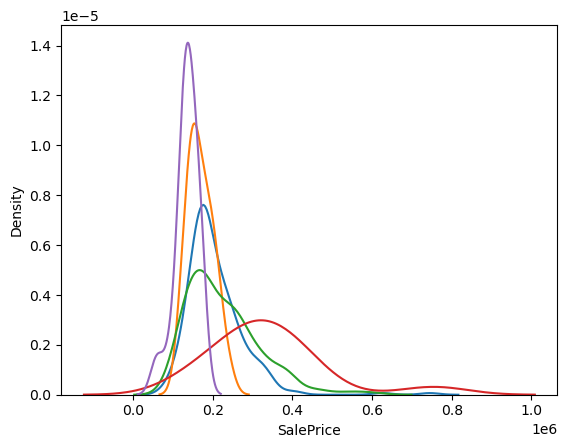

In [168]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'], hist=False, label=category)

D:\Temp\ipykernel_1180\2384781599.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'], hist=False, label=category)
D:\Temp\ipykernel_1180\2384781599.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_tr

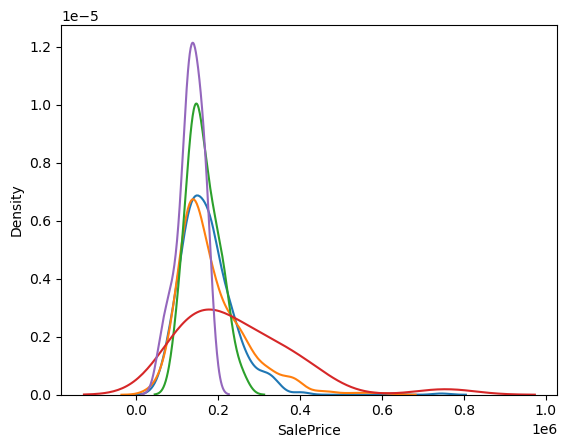

In [172]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'], hist=False, label=category)